In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression


In [2]:
data = {
    'ID': [1, 2, 3, 4, 5, 6],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female'],
    'Country': ['USA', 'Canada', 'USA', 'Canada', 'Mexico', 'Mexico'],
    'Education': ['Bachelor', 'Master', 'PhD', 'Bachelor', 'Master', 'PhD'],
    'Income': [50000, 60000, 80000, 40000, 70000, 90000]
}

In [3]:
df = pd.DataFrame(data)
df

,ID,Gender,Country,Education,Income
0,1,Male,USA,Bachelor,50000
1,2,Female,Canada,Master,60000
2,3,Female,USA,PhD,80000
3,4,Male,Canada,Bachelor,40000
4,5,Male,Mexico,Master,70000
5,6,Female,Mexico,PhD,90000


In [4]:
label_encoder = LabelEncoder()
df['Education_LabelEncoded'] = label_encoder.fit_transform(df['Education'])


In [5]:
ohe = OneHotEncoder(sparse=False, drop='first')
ohe_df = pd.DataFrame(ohe.fit_transform(df[['Gender', 'Country']]))
df_encoded = pd.concat([df, ohe_df], axis=1)


/home/sonali/Documents/jupyter_project/test/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
df_encoded.drop(['Gender', 'Country'], axis=1, inplace=True)


In [7]:
df_encoded


,ID,Education,Income,Education_LabelEncoded,0,1,2
0,1,Bachelor,50000,0,1.0,0.0,1.0
1,2,Master,60000,1,0.0,0.0,0.0
2,3,PhD,80000,2,0.0,0.0,1.0
3,4,Bachelor,40000,0,1.0,0.0,0.0
4,5,Master,70000,1,1.0,1.0,0.0
5,6,PhD,90000,2,0.0,1.0,0.0


In [8]:
data = {'ID': [1, 2, 3, 4, 5],
    'Education': ['Bachelor', 'Master', 'PhD', 'Master', 'Bachelor'],
    'Income': [50000, 60000, 80000, 70000, 55000]}

In [9]:
df = pd.DataFrame(data)
df

,ID,Education,Income
0,1,Bachelor,50000
1,2,Master,60000
2,3,PhD,80000
3,4,Master,70000
4,5,Bachelor,55000


In [10]:
label_encoder = LabelEncoder()

df['Edu'] = label_encoder.fit_transform(df['Education'])
df

# numerical labels to 'Education' column,'Bachelor' as label 0, 'Master' as 2, and 'PhD' as 1.

,ID,Education,Income,Edu
0,1,Bachelor,50000,0
1,2,Master,60000,1
2,3,PhD,80000,2
3,4,Master,70000,1
4,5,Bachelor,55000,0


##
string

In [11]:
le =LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])

LabelEncoder()

In [12]:
list(le.classes_)

['amsterdam', 'paris', 'tokyo']

In [13]:
le.transform(["paris", "paris", "tokyo", "amsterdam"])

array([1, 1, 2, 0])

In [14]:
list(le.inverse_transform([2, 2, 1]))

['tokyo', 'tokyo', 'paris']

In [15]:
list(le.inverse_transform([1, 0, 1]))

['paris', 'amsterdam', 'paris']

##
Numbers

In [16]:
le.fit([1, 2, 2, 6])

LabelEncoder()

In [17]:
le.classes_

array([1, 2, 6])

In [18]:
le.transform([1, 1, 2, 6])

array([0, 0, 1, 2])

In [19]:
le.inverse_transform([0, 0, 1, 2]) #array([1, 1, 2, 6])

# list(le.inverse_transform([1, 0, 1]))  #[2, 1, 2]

array([1, 1, 2, 6])

##
Code basics one hot encodign and label encoding


##

In [20]:
town = pd.read_csv('homeprices.csv')
town

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [21]:
# if we give  monroe township=1 , west windsor=2 ,  robinsville=3
# then machine things that robinsville is less than monroe and west and visa versa

##
Using pandas to create dummy variables


In [22]:
dummies = pd.get_dummies(town.town).astype('int32')
# dummies = pd.get_dummies(town.town,drop_first=True).astype('int32')
# can drop it here only instead in future
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [23]:
merged = pd.concat([town,dummies],axis='columns')
final = merged.drop(['town'], axis='columns')
final

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


##
Dummy Variable Trap


When you can derive one variable from other variables, they are known to be multi-colinear.
Here if you know values of california and georgia then you can easily infer value of new jersey
state, i.e. california=0 and georgia=0. There for these state variables are called to be multi-colinear.
In this situation linear regression won't work as expected. Hence you need to drop one column.


NOTE: sklearn library takes care of dummy variable trap hence even if you don't drop one of the 
state columns it is going to work, however we should make a habit of taking care of dummy variable 
trap ourselves just in case library that you are using is not handling this for you

In [24]:
# dummies = pd.get_dummies(town.town,drop_first=True).astype('int32')

final = final.drop(['west windsor'], axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [25]:
X = final.drop('price', axis='columns')  # independent
y = final.price                          #  dependent

In [26]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [27]:
model.predict(X) # 2600 sqr ft home in new jersey

# final['new'] = model.predict(X)

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [28]:
model.score(X,y)

# to check hwo accurate iur model is

0.9573929037221872

In [29]:
# model.predict([[3400,0,0]]) # 3400 sqr ft home in west windsor
model.predict([[2800,0,1]]) # 2800 sqr ft home in robbinsville

/home/sonali/Documents/jupyter_project/test/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

##
Using sklearn OneHotEncoder


First step is to use label encoder to convert town names into numbers

In [30]:
town

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [31]:
le = LabelEncoder()
dfle = town # we are creatign a new df,no need to play with the existign df
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [32]:
X = dfle[['town','area']]
y = dfle.price.values
y


array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000])

##
Now use one hot encoder to create dummy variables for each of the town



In [33]:
# ohe = OneHotEncoder(categorical_features=[0])
# TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'categorical_features'
#  cate_feat was in the older verwsion so use ColumTransformer instead


# x = ohe.fit_transform(X).toarray()
# x

# X = X[:,1:] # will drop the 1st col
# X

# # ohe.fit_transform(X)  # saprsh matric
# # ohe.fit_transform(X.town) #AttributeError: 'numpy.ndarray' object has no attribute 'town'

In [34]:
from sklearn.compose import ColumnTransformer
# Define the transformer
ct = ColumnTransformer([('town', OneHotEncoder(categories='auto'), [0])], remainder='passthrough')

# Apply the transformation
X = ct.fit_transform(X)
X


array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [35]:
X = X[:,1:]  # droped the frist col our town col whcih is no logner needed
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [36]:
model.fit(X,y)


LinearRegression()

In [37]:
model.predict([[0,1,3400]]) # 3400 sqr ft home in west windsor

array([681241.6684584])

In [38]:
model.predict([[1,0,2800]]) # 2800 sqr ft home in robbinsville

array([590775.63964739])

In [39]:
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [40]:
new = town
new

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [41]:
a = new[['town','area']]
b = new.drop(['town','area'],axis = 1)


o = OneHotEncoder()
n = o.fit_transform(a[['town']]).toarray()

In [42]:
a.town

0     0
1     0
2     0
3     0
4     0
5     2
6     2
7     2
8     2
9     1
10    1
11    1
12    1
Name: town, dtype: int64

In [43]:
model.fit(a,b)

LinearRegression()

In [44]:
# model.predict([[]])

##
Example 2 for onehotencoding

##

In [45]:
data = pd.DataFrame({'color': ['red', 'blue', 'green', 'green', 'red']})
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data[['color']]).toarray()

# Convert the transformed data back to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['color']))
encoded_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


##
Example 2 for onehotencoding

##

In [46]:
data = pd.DataFrame({'color': ['red', 'blue', 'green', 'green', 'red'],
                     'size': ['small', 'large', 'medium', 'large', 'small']})

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data[['color', 'size']]).toarray()

# Convert the transformed data back to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['color', 'size']))
encoded_df


,color_blue,color_green,color_red,size_large,size_medium,size_small
0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0


##
Exercise

This file has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())

##

In [47]:
car = pd.read_csv('carprices.csv')
car

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


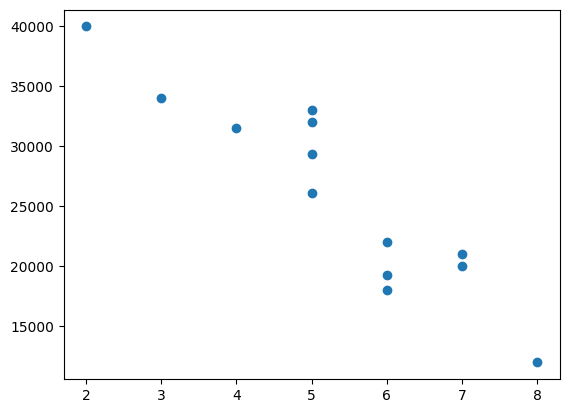

In [48]:

plt.scatter(car['Age(yrs)'],car['Sell Price($)'])
plt.show()

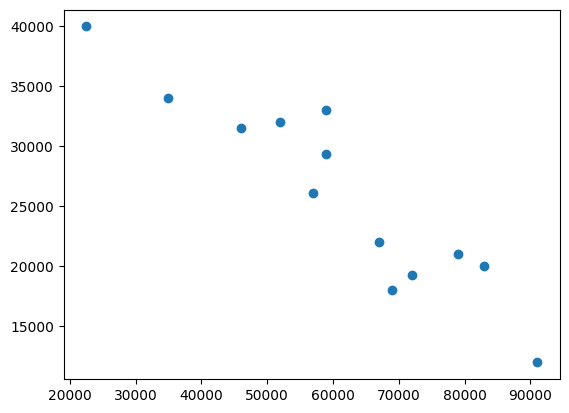

In [49]:

plt.scatter(car['Mileage'],car['Sell Price($)'])
plt.show()

In [50]:
inde = car.drop('Sell Price($)',axis=1)
# inde
# dummies = pd.get_dummies(town.town,drop_first=True).astype('int32')

inde_dummies = pd.get_dummies(inde['Car Model'],drop_first=1).astype('int32')
inde_dummies

ind_final = pd.concat([inde,inde_dummies],axis=1)
ind_final


,Car Model,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,BMW X5,69000,6,1,0
1,BMW X5,35000,3,1,0
2,BMW X5,57000,5,1,0
3,BMW X5,22500,2,1,0
4,BMW X5,46000,4,1,0
5,Audi A5,59000,5,0,0
6,Audi A5,52000,5,0,0
7,Audi A5,72000,6,0,0
8,Audi A5,91000,8,0,0
9,Mercedez Benz C class,67000,6,0,1


In [51]:
ind_final = ind_final.drop('Car Model',axis=1)


In [52]:
ind_final

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [53]:
depe = car['Sell Price($)']
depe

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [54]:
model = LinearRegression()
model.fit(ind_final,depe)

LinearRegression()

In [55]:
model.predict([[45000,4,0,1]])

/home/sonali/Documents/jupyter_project/test/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [56]:
model.score(ind_final,depe)

0.9417050937281082

In [57]:
data = np.array(['Red', 'Blue', 'Green', 'Red'])
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(data)

onehot_encoder = OneHotEncoder(sparse=False)
encoded_data = onehot_encoder.fit_transform(encoded_labels.reshape(-1, 1))

encoded_data


/home/sonali/Documents/jupyter_project/test/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [59]:
data = pd.DataFrame({'Color': ['Red', 'Blue', 'Green']})
encoded_data = pd.get_dummies(data['Color'], prefix='Color').astype('int32')
encoded_data

,Color_Blue,Color_Green,Color_Red
0,0,0,1
1,1,0,0
2,0,1,0


In [63]:
data = pd.DataFrame({'Size': ['Small', 'Large', 'Medium', 'Extra-Large']})
encoded_data = pd.get_dummies(data['Size'], prefix='Size', dummy_na=True).astype('int32')

encoded_data

,Size_Extra-Large,Size_Large,Size_Medium,Size_Small,Size_nan
0,0,0,0,1,0
1,0,1,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0


In [74]:
data = pd.DataFrame({'Color': ['Red', 'Blue', 'Green'],
                     'Size': ['Small', 'Large', 'Medium']})

columns_to_encode = ['Color', 'Size']
# transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), columns_to_encode)],remainder='passthrough')
transformer = ColumnTransformer([('d', OneHotEncoder(categories='auto'), columns_to_encode)],remainder='passthrough')
encoded_data = transformer.fit_transform(data)

encoded_data


# ct = ColumnTransformer([('town', OneHotEncoder(categories='auto'), [0])], remainder='passthrough')


array([[0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0.]])

In [84]:
data = pd.DataFrame({'Size': ['Small', 'Large', 'Medium', 'Extra-Large']})

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(data)

# Get the unique categories after handling unseen categories
categories = encoder.categories_[0] #array(['Extra-Large', 'Large', 'Medium', 'Small'], dtype=object)

encoded_df = pd.DataFrame(encoded_data, columns=[f'Size_{category}' for category in categories])

encoded_df


/home/sonali/Documents/jupyter_project/test/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Size_Extra-Large,Size_Large,Size_Medium,Size_Small
0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
